<a href="https://colab.research.google.com/github/ThomasMcDaniel91/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  
  numerator =  true_positive_rate * prob_drunk_prior
  denominator = prob_drunk_prior*true_positive_rate + false_positive_rate*(1-prob_drunk_prior)
  chance = numerator / denominator
  return chance


In [14]:
test1 = prob_drunk_given_positive(1/1000, .08, 1)
print(test1)

0.012357884330202669


The probability of a person being drunk after 1 test is 1.23%

In [15]:
test2 = prob_drunk_given_positive(test1, .08, 1)
print(test2)

0.13525210993291495


The probability of a person being drunk after 2 tests becomes 13.52%

In [16]:
test3 = prob_drunk_given_positive(test2, .08, 1)
print(test3)

0.6615996951348605


In [18]:
test4 = prob_drunk_given_positive(test3, .08, 1)
print(test4)

0.9606895076105054


This function requires 4 attempts to give a 96.06% probability that a person is actually drunk beyond the limit.

2) Explore scipy.stats.bayes_mvs
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.

Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:

In [78]:
import pandas as pd
from scipy import stats
import numpy as np
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'y' : 1, 'n': 0, '?': np.NaN})
df.head()


def confidence_interval(data, confidence=0.95):
  #turns the data input into a numpy array
  data = data.dropna()
  #getting the mean of the data that has been input
  mean = np.mean(data)
  #setting our sample size to the length of the input
  n = len(data)
  #setting the standard deviation of the input data
  s = data.std()
  #formula for the standard error
  stderr = s / np.sqrt(n)
  #gets the t-statistic that includes 95% of the area under the curve for
  #the given amount of freedom represented by n - 1
  t = stats.t.ppf((1 + confidence) / 2, n-1)
  margin_of_error = t * stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)


--2020-03-18 23:36:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.04s   

2020-03-18 23:36:19 (481 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [87]:
repub = df[df['party'] == 'republican']
repub = repub.dropna()
demo = df[df['party'] == 'democrat']
demo = demo.dropna()

ci = confidence_interval(repub['budget'])
ci

(0.1574074074074074, 0.08761355698812183, 0.22720125782669298)

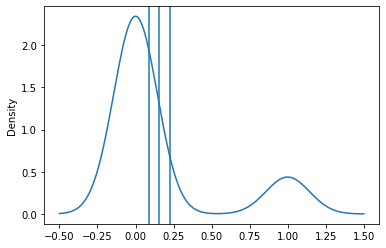

In [88]:
repub['budget'].plot.density()
plt.axvline(x=ci[0])
plt.axvline(x=ci[1])
plt.axvline(x=ci[2])
plt.show()

In [91]:
mean, variance, std_dev = stats.bayes_mvs(repub['budget'], alpha=0.95)
print(mean)
print(variance)
print(std_dev)

Mean(statistic=0.1574074074074074, minmax=(0.08761355698812176, 0.22720125782669306))
Variance(statistic=0.13641975308641976, minmax=(0.10416243207233418, 0.17845581020932047))
Std_dev(statistic=0.36847210103926065, minmax=(0.32274205191194744, 0.42244030372269226))


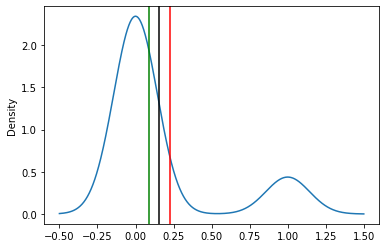

In [98]:
repub['budget'].plot.density()
plt.axvline(mean[0], color='black')
plt.axvline(mean[1][0], color='green')
plt.axvline(mean[1][1], color='red')

**3) In your own words, summarize the difference between Bayesian and Frequentist statistics**

The main difference I found between Bayesian statistics and Frequentist statistics is that Bayesian statistics uses prior information in their formula for finding probability where as frequentist statistics only uses what they have for data with no prior or even posterior findings.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!